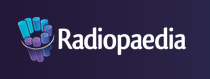Radiopaedia Notebook on Augmented Images as a Didactic Exercise

The following notebook was created with two purposes in mind. One purpose was to help radiologists and radiographers interested in making AI create more data, the other purpose was to show code. Globally, only a small percentage of people know how to program a computer with code, and many imaging professionals do not know how to code. As AI becomes more commonplace in healthcare, there is an ongoing debate about how much medical professionals should understand about computers and coding.
Many people assume code is extremely complex, and it can be, however code is simply a way to communicate with computers. Many coding languages are close to human languages, not the strings of zeros and ones that the computer stores. This notebook is written in Python. To run the notebook (as of October 2019) you will need to have Jupyter on your computer. I'm looking for the best way to make this a notebook accesible to all soon. 
The notebook has a few functions useful to create augmented data from existing images. If you have never used a notebook before, it's very simple. Just run each cell and follow instructions. If you find too many terms in this notebook confusing you can always use Radiopaedia to find articles for terms such as Python, neural network and linear algebra. Although these topics are not covered in depth, Radiopaedia can provides a good starting point to understand them. 

In [131]:
import os
import numpy as np
import skimage.data
import matplotlib.pyplot as plt
from skimage.data import immunohistochemistry
from PIL import Image as PILImage, ImageFilter

Above some libraries- these are groups of premade functions- are imported. Python has a standard set of functions built in, but you can import more from exisitng libraries. Now let's import an image to augment via computer programming

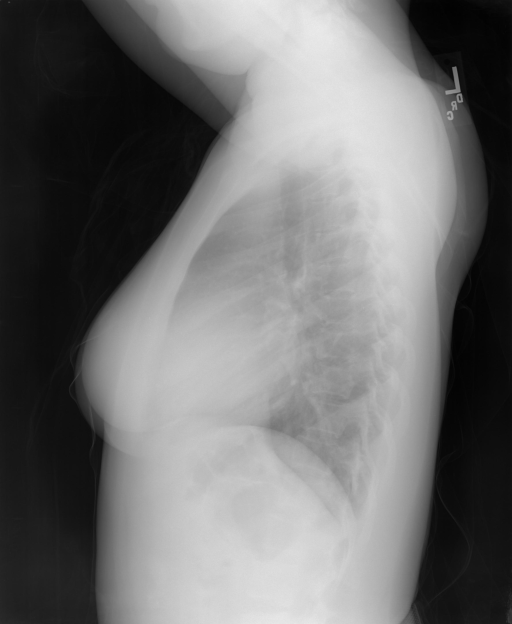

In [132]:
from IPython.display import Image as IPythonImage
IPythonImage(filename='images/CXR1_1_IM-0001-3001.png')

The above image is an image we might want to create some augmented data from for a program

Now we will write a function I would not suggest experimenting with- we can create endless augmented images with later functions I reccomend changing to 'play' with the functions. Depending on how you learn playing with  the functions may be a very fast way to understand what they tell the computer to do.

In [133]:
def show(img, cmap=None):
    cmap = cmap or plt.cm.gray
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    ax.imshow(img, cmap=cmap)
    ax.set_axis_off()
    plt.show()

In [134]:
im = PILImage.open('images/CXR1_1_IM-0001-3001.png', 'r')


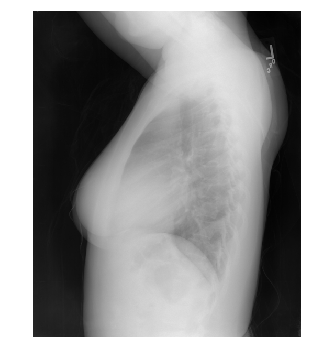

In [135]:


show(np.asarray(im))

Here is a function to play with the numbers in. Welcome to linear algebra wonderland. Please try it once with my numbers so you get the point of what I'm doing

In [137]:
# to scew it
im1 = im.transform(im.size, PILImage.AFFINE, [1, -0.0018, -20,0.039, 1.0337, -20], resample=PILImage.BICUBIC)
# if you have never coded before you will notice these comments in English. In Python the # sign denotes a comment.
# generally speaking it's a good idea to include lots of comments in your code for various reasons
# including that it makes it eisier for other people to understand, or you to understand months later


That should scew the image- making it a different - augmented image. Let's show it

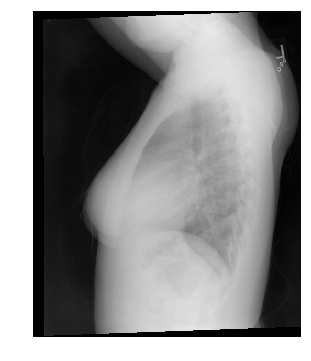

In [88]:
#here we show the image we just transformed with the line above
show(im1)

OK, let's make another one- this time you should 'plaý' with the numbers. Change them, and re-run the code box. Try putting changing the 1 to-1 for the first number. You should get a black box. Can you guess why? Try changing the number back to 1, then 0.8, then 0.5... then try changing other numbers in the vector...

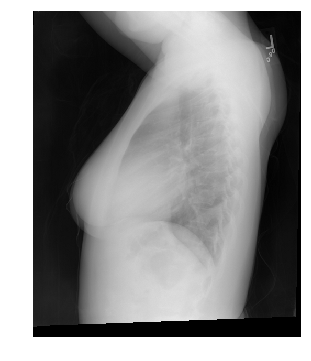

In [118]:
im2 = im.transform(im.size, PILImage.AFFINE, [1, 0.018, -1,0.039, 1.0337, -0.1], resample=PILImage.BICUBIC)

show(im2)

Above we used a function that was actually fairly simple. Let's try some slightly more more complex math. Change the number - and see what happens.

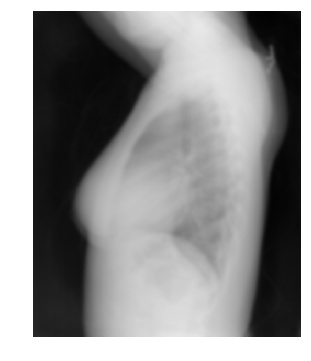

In [128]:
im_gauss= im.filter(ImageFilter.GaussianBlur(3))

show(im_gauss)

So by changing the number we are changing an input to a function that does something to our matrix. Many different functions can be used to create augmented data. Let's try another one where you can change the numbers:

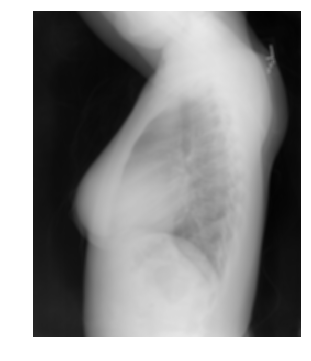

In [130]:
#here is some slightly different math to augment with

im_otherfilter =im.filter(ImageFilter.BoxBlur(3))

show(im_otherfilter )

To make a lot of data, at the level it takes to train for example an artificial neural network, creating three different images - as our code above just did- for every one you have by hand inside a grapgical user interface based program (something like Photoshop or GIMP) will take nearly endless amounts of time. The beauty of code like that written above is that similar code can be easily applied to images thousands at a time. Even if you can only work with openly available images on the internet, you can quickly get to numbers of images sofficient to train and test of a neural network. If you already code a bit, and just want a recipe to make a bunch of augmented data from a file of data you already have, then you can try something like this (I use examples of folders on my computer, but if you code you will know how to adapt this to your environment):

#if you copy this code you will have to change the folders you want it to work on
#presuming you do not have a folder r"C:\Users\makeda\programming\catapop\images" with your images

import os
from PIL import Image

pictures = os.listdir (r"C:\Users\makeda\programming\catapop\images")

file_currently_reading = 0
file_number_count = len(pictures)
 
while file_currently_reading < file_number_count:
    filename = pictures[file_currently_reading]

    im = Image.open(r"C:\Users\makeda\programming\catapop\images\\" + filename)
  
    im= im.transform(im.size, Image.AFFINE, [1,-0.0018, -20,0.039,1.0337,-20],resample=Image.BICUBIC)
    im.save(r"C:\Users\makeda\programming\catapop\images\transformed\\"+filename,"PNG")
        
    file_currently_reading =   file_currently_reading +1
    

Now let's look around a bit "under the hood" of what is coded above - because along the way, you can learn the basic building blocks some AI and image processing programs are using. Remember our original image?

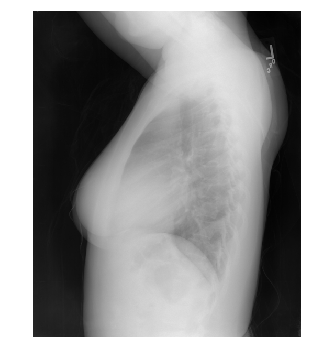

In [94]:
#show the original image
show(np.asarray(im))

So that's a digital image- a visualization created from digital data. And we could just as easily look at the data itself. Warning (there will be some ... to stand for in for some numbers because there is so much data in even this one single image it's pointless to try and read it all)

In [95]:
#print out the array of the image
print(np.asarray(im))

[[[45 45 45]
  [30 30 30]
  [27 27 27]
  ...
  [20 20 20]
  [21 21 21]
  [22 22 22]]

 [[28 28 28]
  [26 26 26]
  [25 25 25]
  ...
  [18 18 18]
  [19 19 19]
  [21 21 21]]

 [[25 25 25]
  [25 25 25]
  [25 25 25]
  ...
  [16 16 16]
  [18 18 18]
  [20 20 20]]

 ...

 [[43 43 43]
  [41 41 41]
  [41 41 41]
  ...
  [55 55 55]
  [53 53 53]
  [50 50 50]]

 [[44 44 44]
  [43 43 43]
  [41 41 41]
  ...
  [54 54 54]
  [56 56 56]
  [51 51 51]]

 [[44 44 44]
  [44 44 44]
  [42 42 42]
  ...
  [36 36 36]
  [49 49 49]
  [48 48 48]]]


If you are paying attention you will notice there are groups of numbers that repeat three times. That's because of the format of the image- a png. The repitition of numbers three times- in 'tuples'- in this context is wasteful. Let's split the images of tuples down to something we can more easily handle

In [96]:
tuples=im.split()
second_element_of_tuple=tuples[1]    
image_string = np.asarray(second_element_of_tuple) 
print(np.asarray(image_string))
    

[[45 30 27 ... 20 21 22]
 [28 26 25 ... 18 19 21]
 [25 25 25 ... 16 18 20]
 ...
 [43 41 41 ... 55 53 50]
 [44 43 41 ... 54 56 51]
 [44 44 42 ... 36 49 48]]


That's more like it. PNG is a format with channels for RGB values (red, green and blue). We usually don't need all that data. Our image can be encoded without it. Note there is still too much data to bother writing all the numbers, and we get a ... for a fill. Let's take a look anyways:

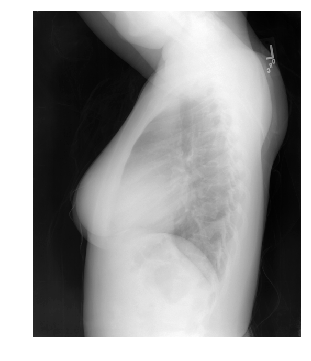

In [97]:
show(image_string)


Looks the same right? Because our image was only black and white the data in the R, G and B channels was redundant. Keeping redundant data around is bad practice, it eats memory, and usually has no point. However, there is an interesting didactic point to be made here. The same picture can be encoded in different ways. It can be encoded in the 'tuples'- the groups of three numbers you saw, or it can be encoded in one single matrix ( if you do not know what a mathematical matrix is, please look it up). The picture is a visualization of these sets of data, specifically matrices. Because we were using a png we had something like three matrices- one for each channel- stacked one on top of the other. The image_string made of simply one channel perfectly captures all the information we care about. Issues of how we encode data are critical to well, everything, but everything is beyond the scope of this notebook.

So now that you see images are just a bunch of numbers organized in a matrix, it should not be a hard task to guess how we are creating augmented data. We are just doing some math on the numbers. Doing math with numbers in matrices is usually a question of linear algebra. 

Some of the best working image classification programs use convolutional neural networks. As the name implies- there is some mathematical convolution going on. Convolutions can be useful to simplify images down to thier edges. But before we get into complex operations like convolutions. Let's use a smaller matrix than our pitcure first becasue it's easier to understand, and do a very simple operation.
[[43 41 41 55 53 50]
 [44 43 41 54 56 51]
 [44 44 42 36 49 48]
 [43 41 41 55 53 50]
 [44 43 41 54 56 51]
 [44 44 42 36 49 48]]

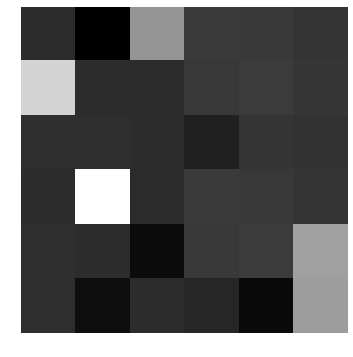

In [98]:
matrix =[[43, 0, 141, 55, 53, 50],
         [200, 43 ,41, 54 ,56, 51],
        [44 ,44 ,42 ,32 ,49 ,48],
     [43 ,241 ,41 ,55 ,53 ,50],
     [44 ,43 ,11 ,54 ,56 ,151],
     [44 ,14 ,42, 36 ,9, 148]]
show(matrix)

You can play with the numbers by hand to make any matrix you want, but the goal is to take a simple small matrix and run some math on it.Try changing the numbers in a matrix until you make out a picture

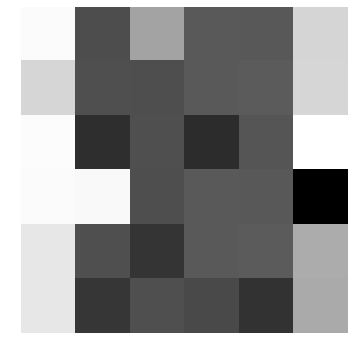

In [99]:
mymatrix =[[243, 40, 141, 55, 53, 198],
         [200, 43 ,41, 54 ,56, 200],
        [244 ,4 ,42 ,2 ,49 ,248],
     [243 ,241 ,41 ,55 ,53 ,-50],
     [220 ,43 ,11 ,54 ,56 ,151],
     [220 ,14 ,42, 36 ,9, 148]]
show(mymatrix)

Maybe you have made something prettier than my abstract interpretation of a fox. But it doesn't matter, we are just going to see how math can change the image. Let's do something very simple before we do a convolution. Let's add a simple matrix to our matrix. You could do it by hand, but that would be slow once you get up to dealing with images the size of an Xray. Let's do it with code. 

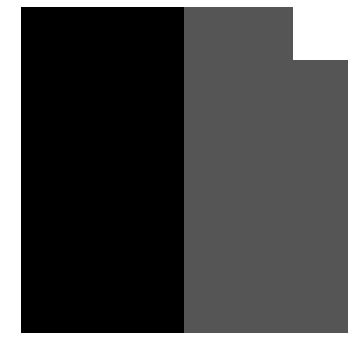

In [100]:
matrix_to_add = [[0,0,0,50,50,150], 
                  [0,0,0,50,50,50], 
                 [0,0,0,50,50,50], 
                 [0,0,0,50,50,50], 
                 [0,0,0,50,50,50], 
                 [0,0,0,50,50,50]] 
show(matrix_to_add)

As you can see our matrix to add is simple- you can change it if you want. Next we will add it to the matrix we called mymatrix. There are actualy many ways you could tell the computer to add the matrices. An experienced programmer will know how to code this operation so it can be done efficiently in terms of the way your it uses computer memory space.  

In [101]:
matrix_to_add = [[0,0,0,50,50,50], 
                 [0,0,0,50,50,50],
                 [0,0,0,50,50,50], 
                 [0,0,0,50,50,50], 
                 [0,0,0,50,50,50], 
                 [0,0,0,50,50,50]] 

result = [[mymatrix[i][j] + matrix_to_add[i][j]  for j in range
(len(mymatrix[0]))] for i in range(len(mymatrix))] 
   
   
for r in result: 
    print(r) 

[243, 40, 141, 105, 103, 248]
[200, 43, 41, 104, 106, 250]
[244, 4, 42, 52, 99, 298]
[243, 241, 41, 105, 103, 0]
[220, 43, 11, 104, 106, 201]
[220, 14, 42, 86, 59, 198]


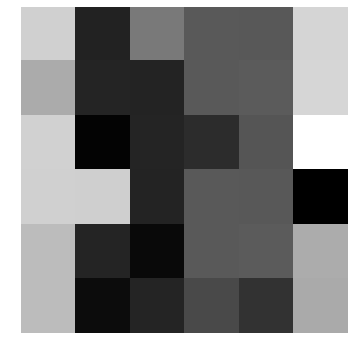

In [102]:
show(result)

We just added two matrices, and visualized the results. Addition isn't the most interesting function we could code. By using more interesting functions on larger images such as digital Xrays, Cts, and so on we can discover a lot about images- and create new ones. When you create new images by playing with the math of old ones you are creating augmented data. Computers and code can make this process extremely fast and efficient. 

There are several reasons to create augmented data when creating AI programs for radiology. One reason you may want to create augmented data is that you just don't have enough data, and don't know where to get more. Another reason is that you can try to use augmented data to combat overfitting in some cases. A third reason, and perhaps the most important, is that you often want to be sure that what your AI is picking up on is the difference you actually care about, not simply an artifact of the images. If you skillfully use augmented data, you can often avoid this potential problem. 

Coding for AI usually involves large amounts of data. Data takes memory resources and time to process for the computers. Although it is extremely popular, Python is not always the best language to accomplish efficient use of time and memory. It's important to understand that programs that crunch as much data as digital images for radiology are computationally heavy. Just because these programs can be coded in almost any language does not mean any language will give similar results. Many programs for image processing are written in Matlab, Octave or R but often if an organization wants the program to run at industrial speed, it will be recoded into the C language. There are a plethora of languages available, and each has advantages and disadvantages.  